In [1]:
from PIL import Image
import os
import pandas as pd
import numpy as np
from tqdm import tqdm

In [62]:
def get_mask(image):
    if type(image) == np.ndarray:
        im_array = image
    else:
        im_array = np.array(image)

    i_s = {}
    count = 0
    for i in range(len(im_array)):
        start = False
        j_s = []
        for j in range(len(im_array[i])):
            if im_array[i][j][3] == 0:
                start = True
                count += 1
                j_s.append(j)
        if start:
            i_s[i] = j_s
    
    keys = list(i_s.keys())
    if not keys:
        return ((0, 0), 0, 0, im_array)
    else:
        start_y = keys[0]
        start_x = i_s[start_y][0]
        height = (keys[-1] - keys[0] + 1)
        width = (i_s[143][-1] - i_s[143][0] + 1)

    return ((start_y, start_x), height, width, im_array)

In [ ]:
def blend_horizontal(image):
    
    

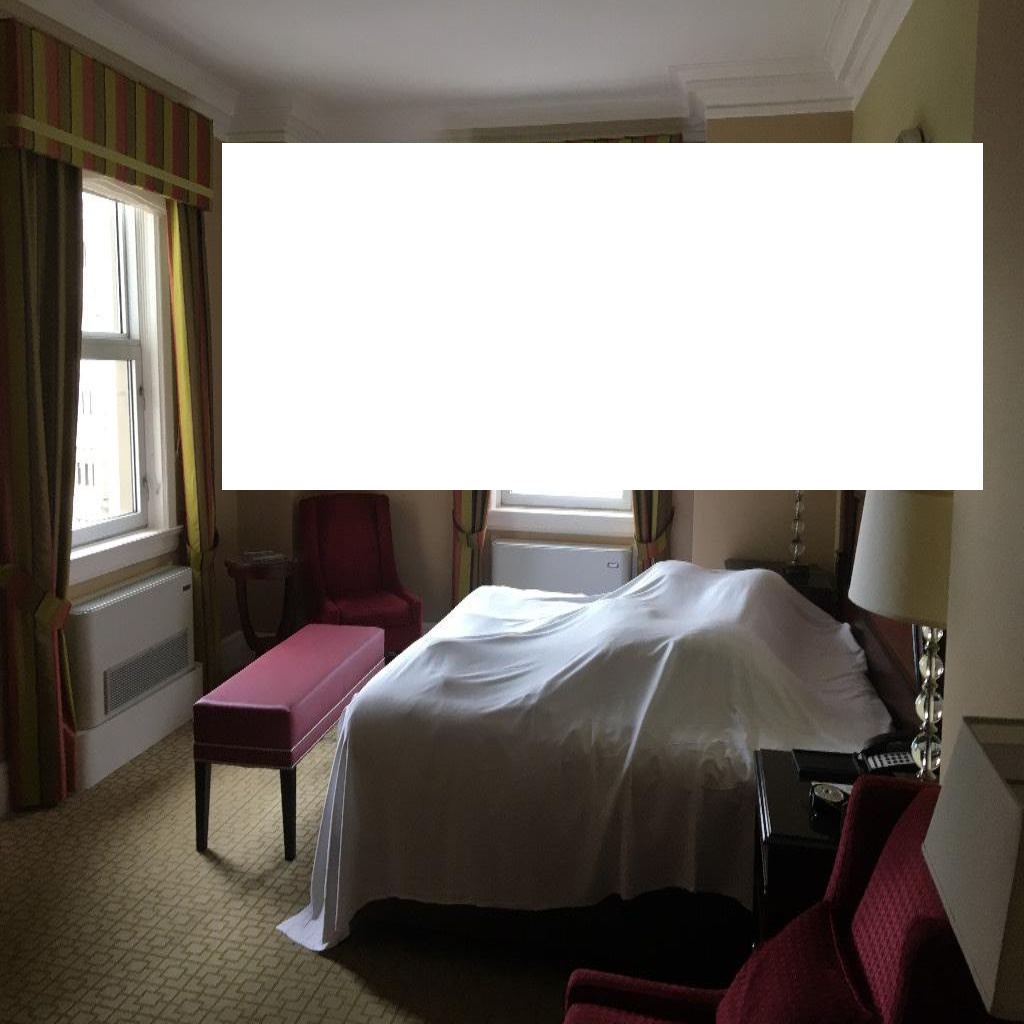

In [63]:
im_path = "/Volumes/Storage/Git Repos/AML/HotelTraffickingData/train/76693/0.png"
im = Image.open(im_path) # Height X Width format
im

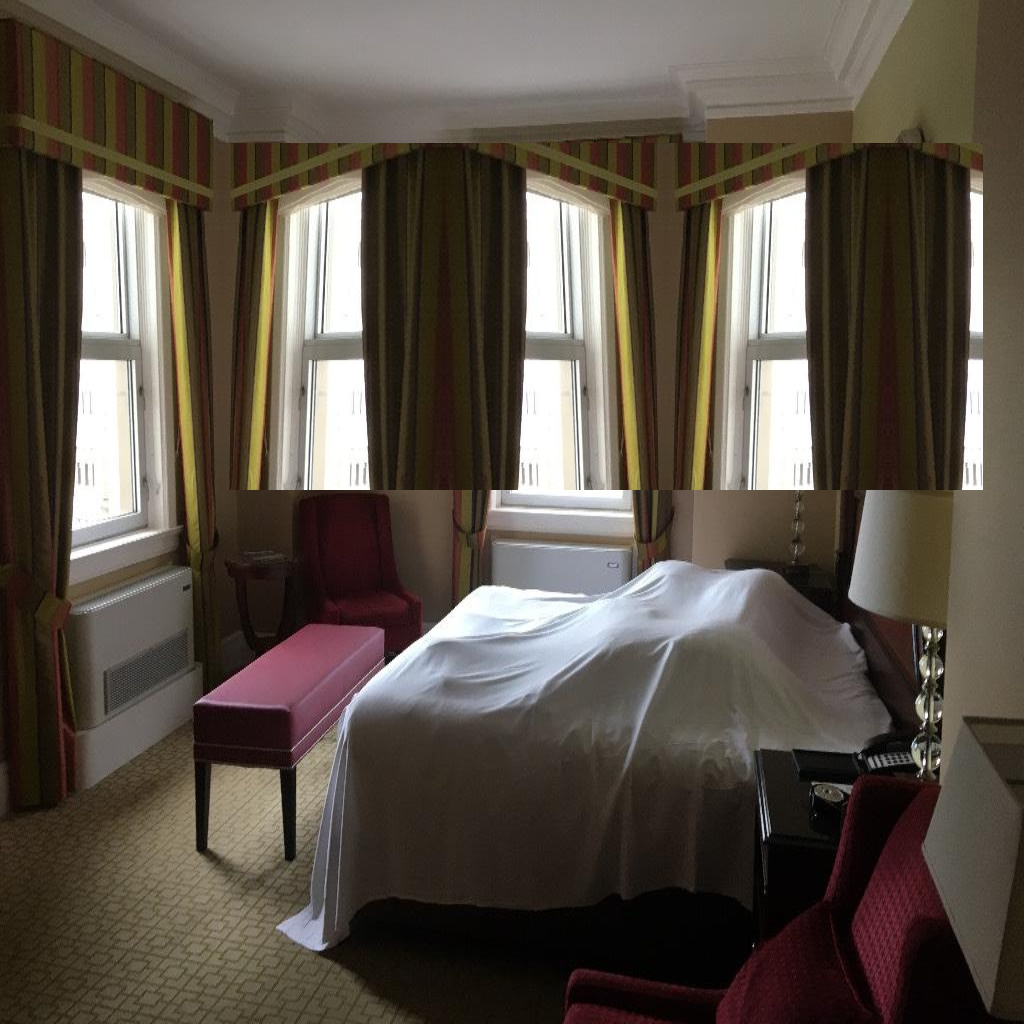

In [67]:
start_pixel, height, width, im_array = get_mask(im)
start_pixel_y, start_pixel_x = start_pixel

cut_x = max(0, start_pixel_x - width)

flip = np.flip(im_array[start_pixel_y: start_pixel_y + height, cut_x: start_pixel_x].copy(), axis=1)
flip[:,:,-1] = flip[:,:,-1]
im_array[start_pixel_y: start_pixel_y + height, start_pixel_x: start_pixel_x + start_pixel_x - cut_x] = flip

im = Image.fromarray(im_array)
im